In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Using the data on student grades from this lesson

In [2]:
# I imported the csv into my directory, so let's import that as a pandas dataframe
df = pd.read_csv('student_grades.csv', index_col='student_id')

In [3]:
df.head()

,exam1,exam2,exam3,final_grade
student_id,,,,
1,100.0,90,95,96
2,98.0,93,96,95
3,85.0,83,87,87
4,83.0,80,86,85
5,93.0,90,96,97


## Inspect the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 4 columns):
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ KB


* Exam 1 is a float when it can probably be an int
* Exam 3 is an object when it definitely shound't be (see if it can be an int)
* We're missing a value, so likely drop the row with the nan

In [5]:
# Check for why exam3 is an object type
df.exam3.value_counts()

96    16
78    16
75    15
70     8
95     8
87     8
86     8
85     8
94     8
79     8
       1
Name: exam3, dtype: int64

In [6]:
df[df.exam3 == '']

,exam1,exam2,exam3,final_grade
student_id,,,,


In [7]:
# Looks like it's got a value of '' in it. This is also essentially a null value, so lets drop that row as well
df.exam3.replace('', np.nan, inplace=True)

# Clean the Data

In [8]:
# Start by dropping the missing values
df.dropna(inplace=True) # This will leave us with 102 rows

In [9]:
# Convert exam 1 to an int instead of a float
df.exam1 = df.exam1.astype(int)

In [10]:
# Verify our data is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 104
Data columns (total 4 columns):
exam1          103 non-null int64
exam2          103 non-null int64
exam3          103 non-null object
final_grade    103 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.0+ KB


# Split the data into train and test datasets.

In [11]:
train, test = train_test_split(df, train_size=.8, random_state=115)

# Create a predictions dataframe to hold our models' predictions

In [12]:
predictions = pd.DataFrame({
    'actual': train.final_grade
    })

# Create a model that uses exam 1 to predict the final grade.

In [13]:
x = train[['exam1']]
y = train.final_grade

In [14]:
# Make the thing
exam1_lm = LinearRegression()

In [15]:
# Fit the thing
exam1_lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Use the thing
predictions['exam1_lm'] = exam1_lm.predict(x)

In [17]:
# Get the coefficients and intercept the model is using
# We'll be using these in our graphs
exam1_coef, exam1_intercept = exam1_lm.coef_, exam1_lm.intercept_

# Create a model that uses exam 2 to predict the final grade.

In [18]:
x = train[['exam2']]
y = train.final_grade

In [19]:
# Make the thing
exam2_lm = LinearRegression()

In [20]:
# Fit the thing
exam2_lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Use the thing
predictions['exam2_lm'] = exam2_lm.predict(x)

In [22]:
# Get the coefficients and intercept the model is using
# We'll be using these in our graphs
exam2_coef, exam2_intercept = exam2_lm.coef_, exam2_lm.intercept_

# Compare your models in the following manner:

## Calculate the mean squared error

In [23]:
predictions.apply(lambda col: mse(predictions.actual, col))

actual       0.000000
exam1_lm     3.925463
exam2_lm    17.645912
dtype: float64

The model using exam 1 to predict final grade outperformed against the model using exam 2 to predict the final grade.

# Visualize the residuals. Create a seperate visualization for each model.

Text(0, 0.5, 'Actual')

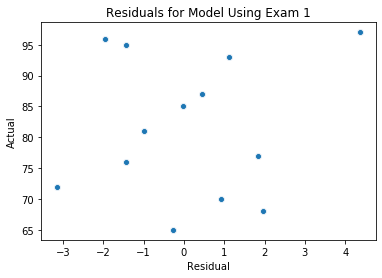

In [24]:
x = predictions.actual - predictions.exam1_lm
y = predictions.actual

sns.scatterplot(x, y)
plt.title('Residuals for Model Using Exam 1')
plt.xlabel('Residual')
plt.ylabel('Actual')

Text(0, 0.5, 'Actual')

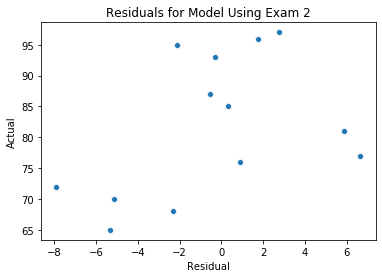

In [25]:
x = predictions.actual - predictions.exam2_lm
y = predictions.actual

sns.scatterplot(x, y)
plt.title('Residuals for Model Using Exam 2')
plt.xlabel('Residual')
plt.ylabel('Actual')

# Visualize the actual vs the predicted values. Create a seperate visualization for each model.

Text(0, 0.5, 'Actual')

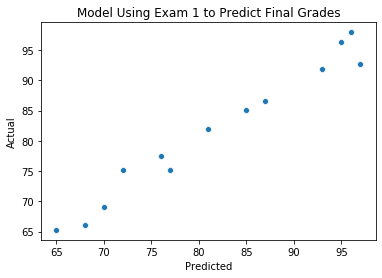

In [26]:
sns.scatterplot(predictions.actual, predictions.exam1_lm)
plt.title('Model Using Exam 1 to Predict Final Grades')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Actual')

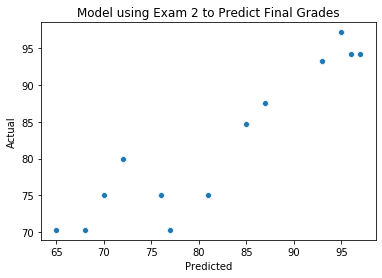

In [27]:
sns.scatterplot(predictions.actual, predictions.exam2_lm)
plt.title('Model using Exam 2 to Predict Final Grades')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

Text(0, 0.5, 'Actual')

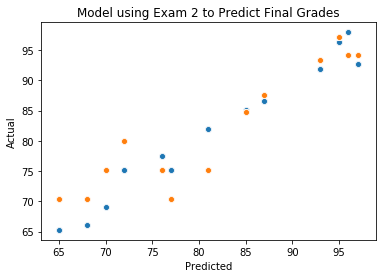

In [28]:
sns.scatterplot(predictions.actual, predictions.exam1_lm)
plt.title('Model Using Exam 1 to Predict Final Grades')
plt.xlabel('Predicted')
plt.ylabel('Actual')

sns.scatterplot(predictions.actual, predictions.exam2_lm)
plt.title('Model using Exam 2 to Predict Final Grades')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [29]:
x = train[['exam1', 'exam2']]
y = train.final_grade

In [30]:
# Make the thing
exam1_and_exam2_lm = LinearRegression()

In [31]:
# Fit the thing
exam1_and_exam2_lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Use the thing
predictions['exam1_and_exam2_lm'] = exam1_and_exam2_lm.predict(x)

In [33]:
# Compare the models
predictions.apply(lambda col: mse(predictions.actual, col))

actual                 0.000000
exam1_lm               3.925463
exam2_lm              17.645912
exam1_and_exam2_lm     3.897872
dtype: float64

It fits just a little bit better, but it adds another dimension to our model. This additional dimension isn't worth the slightly better fit provided by the new model

## Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [34]:
x_test = test[['exam1']]

test_predictions = exam1_lm.predict(x_test)
test_actual = test.final_grade

mse(test_actual, test_predictions)

2.761031022282121

Model did better on the test data than it did on the train data.

# Telco

Our scenario continues:

>  a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of 5.00 dollars per customer.

## Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

## Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

## Evaluate the models and your baseline.

## Select the model that performed the best, and apply it to your test data.